In [670]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
import category_encoders as ce
import math

from scipy import stats
from scipy.stats import norm


In [671]:
#import long name csv
mh_long = pd.read_csv('Mental Health in Tech Survey (Responses) - Form Responses 1.csv')
mh_long.head()

,Timestamp,Age,Gender,Country,"If you live in the United States, which state or territory do you live in?",Are you self-employed?,Do you have a family history of mental illness?,Have you sought treatment for a mental health condition?,"If you have a mental health condition, do you feel that it interferes with your work?",How many employees does your company or organization have?,...,How easy is it for you to take medical leave for a mental health condition?,Do you think that discussing a mental health issue with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you be willing to discuss a mental health issue with your coworkers?,Would you be willing to discuss a mental health issue with your direct supervisor(s)?,Would you bring up a mental health issue with a potential employer in an interview?,Would you bring up a physical health issue with a potential employer in an interview?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?,Any additional notes or comments
0,8/27/2014 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,8/27/2014 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,8/27/2014 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,8/27/2014 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,8/27/2014 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [672]:
#import concise name csv
mh_short = pd.read_csv('Mental_Health_survey.csv')
mh_short.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


<AxesSubplot:>

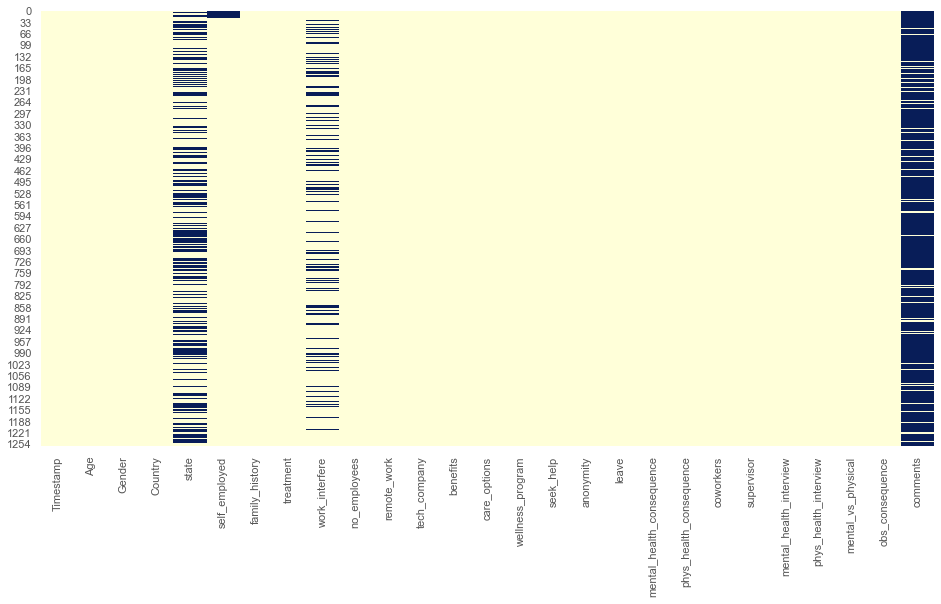

In [673]:
#visualize nulls
sns.heatmap(mh_short.isnull(),cbar=False, cmap='YlGnBu')

In [674]:
mh_short.nunique()

Timestamp                    1246
Age                            53
Gender                         49
Country                        48
state                          45
self_employed                   2
family_history                  2
treatment                       2
work_interfere                  4
no_employees                    6
remote_work                     2
tech_company                    2
benefits                        3
care_options                    3
wellness_program                3
seek_help                       3
anonymity                       3
leave                           5
mental_health_consequence       3
phys_health_consequence         3
coworkers                       3
supervisor                      3
mental_health_interview         3
phys_health_interview           3
mental_vs_physical              3
obs_consequence                 2
comments                      160
dtype: int64

In [675]:
mh = mh_short.drop(mh_short.columns[[0,3,4,26]], axis = 1)
mh.head(5)

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,NaN,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,NaN,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,NaN,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,NaN,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,NaN,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [676]:
# treating missing work_interfere
mh['work_interfere'].isnull().sum()

264

In [677]:
## No of people in work interference with no treatment
mh[mh['treatment']=='No']['work_interfere'].value_counts(dropna=False)

NaN          260
Never        183
Sometimes    107
Rarely        51
Often         21
Name: work_interfere, dtype: int64

In [678]:
## No of people with work interference and taking treatment
mh[mh['treatment']=='Yes']['work_interfere'].value_counts(dropna=False)

Sometimes    358
Often        123
Rarely       122
Never         30
NaN            4
Name: work_interfere, dtype: int64

In [679]:
#Assuming people not taking treatment as facing work_interference,impute missing work_interfere 'No' treatment with 'Never' 
#and remaining 4 missing work_interference who are taking treatment in sometimes
treatment1 = mh[mh['treatment']=='Yes']
treatment0 = mh[mh['treatment']=='No']

treatment0['work_interfere'] = treatment0['work_interfere'].fillna('Never')
treatment1['work_interfere'] = treatment1['work_interfere'].fillna('Sometimes')

mh = pd.concat([treatment1,treatment0],axis=0)

C:\Users\MONIK~1.LAP\AppData\Local\Temp/ipykernel_30168/2845195106.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treatment0['work_interfere'] = treatment0['work_interfere'].fillna('Never')
C:\Users\MONIK~1.LAP\AppData\Local\Temp/ipykernel_30168/2845195106.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treatment1['work_interfere'] = treatment1['work_interfere'].fillna('Sometimes')


<AxesSubplot:xlabel='treatment', ylabel='count'>

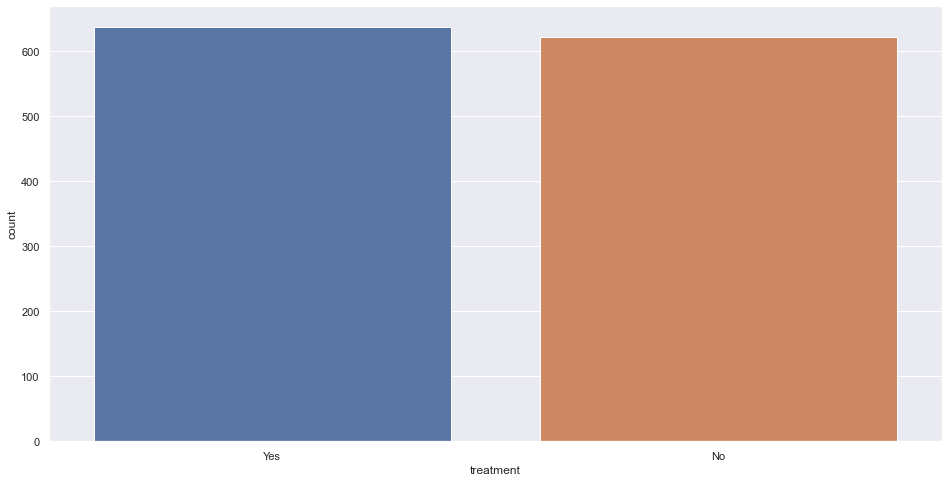

In [680]:
#Visualize target variable  
sns.set(rc={"figure.figsize":(16, 8)})
sns.countplot(x='treatment', data = mh)

#balanced data

<AxesSubplot:xlabel='Age', ylabel='count'>

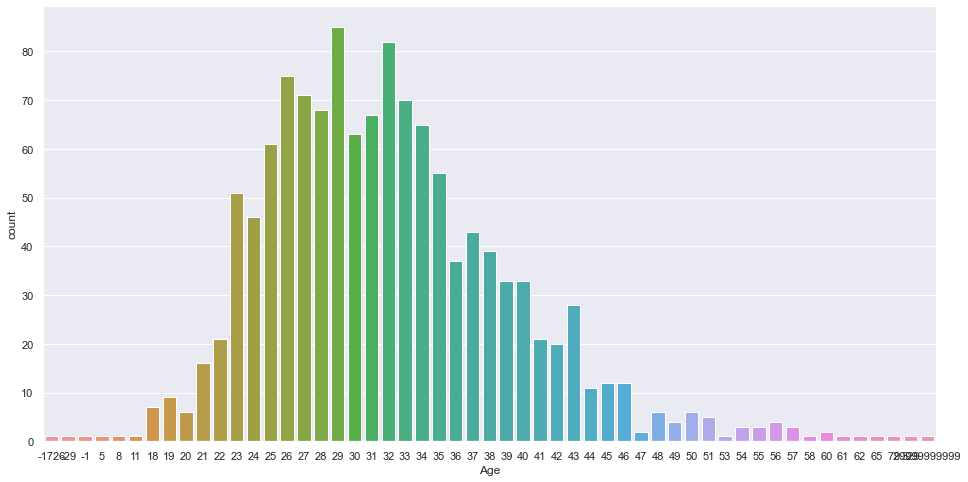

In [681]:
#Visualize Age
sns.set(rc={"figure.figsize":(16, 8)})
sns.countplot(x='Age', data = mh)

In [682]:
#clean Age
mh['Age'] = np.where((mh['Age'] < 18), 21, mh.Age)
mh['Age'] = np.where((mh['Age'] > 60), 60, mh.Age)
mh['Age'].unique()  

array([37, 31, 35, 42, 29, 23, 32, 46, 41, 33, 34, 30, 40, 27, 24, 38, 22,
       44, 26, 39, 25, 28, 45, 18, 19, 36, 43, 21, 56, 54, 60, 55, 57, 58,
       47, 51, 49, 48, 53, 20, 50], dtype=int64)

<AxesSubplot:xlabel='Age', ylabel='count'>

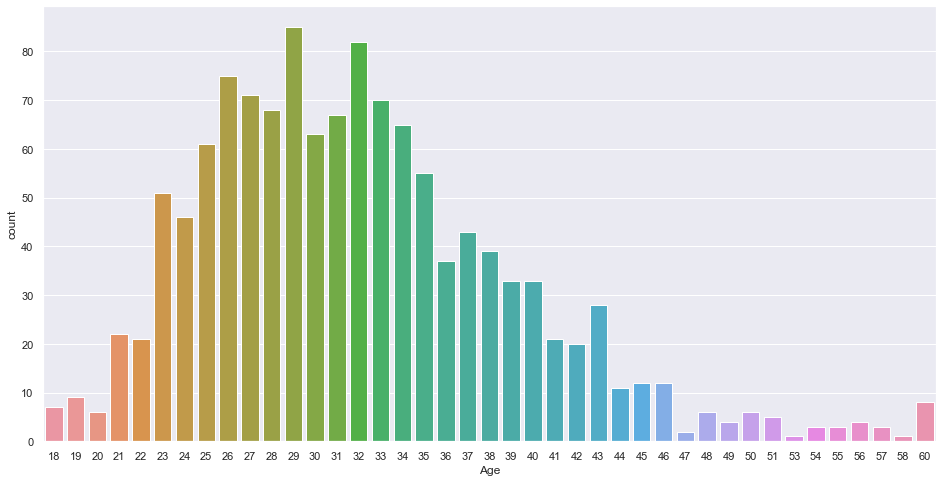

In [683]:
#Visualize new Age
sns.set(rc={"figure.figsize":(16, 8)})
sns.countplot(x='Age', data = mh)

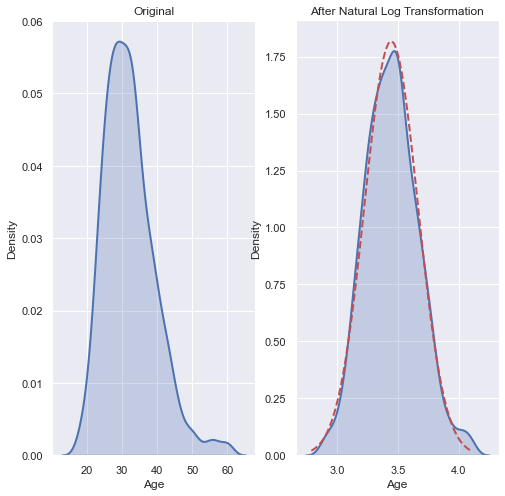

In [684]:
#log transform skewed age
Age_original = mh['Age'].copy()
mh['Age'] = [math.log(x) for x in mh['Age']]


#values for plotting a normal distribution for the transformed "Age" variable
mean, std = mh.Age.mean(), mh.Age.std()
x = np.arange(mean - (3 * std), mean + (3 * std), std / 10)

#plot the untransformed and transformed distributions for the "Serum_Insulin" variable
fig, ax = plt.subplots(1, 2, figsize=(8,8))
sns.kdeplot(Age_original, ax=ax[0], fill=True, lw=2)
sns.lineplot(x=x, y=norm.pdf(x, mean, std), ax=ax[1], lw=2, color='r', linestyle='--')
sns.kdeplot(mh.Age, ax=ax[1], fill=True, lw=2)
ax[0].title.set_text('Original')
ax[1].title.set_text('After Natural Log Transformation')

In [685]:
mh['Gender'].unique()

array(['Female', 'Male', 'female', 'male', 'M', 'Male-ish', 'Cis Female',
       'F', 'Cis Male', 'f', 'queer/she/they', 'non-binary', 'm', 'woman',
       'Make', 'Nah', 'All', 'Enby', 'fluid', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'Male ', 'Trans woman',
       'Neuter', 'Female (trans)', 'queer', 'Female ',
       'A little about you', 'Malr', 'p', 'Woman', 'Cis Man',
       'ostensibly male, unsure what that really means', 'maile',
       'Trans-female', 'something kinda male?', 'Mal', 'Male (CIS)',
       'Femake', 'Genderqueer', 'male leaning androgynous', 'Man', 'msle',
       'Female (cis)', 'Mail', 'cis male', 'femail'], dtype=object)

In [686]:
#Categorize gender names
Male = ['cis male', 'Cis Male', 'Cis Man', 'Guy (-ish) ^_^', 'm',  'M', 'Mail', 'maile', 'Make', 'Mal', 'male', 'Male', 'Male-ish', 'Male ', 'Male (CIS)', 'Malr', 'Man', 'msle', 'something kinda male?']
Female = ['cis-female/femme', 'Cis Female', 'f', 'F', 'femail', 'Femake', 'female', 'Female', 'Female ', 'Female (cis)', 'woman', 'Woman']
Non_binary = ['A little about you', 'Agender', 'All', 'Androgyne', 'Enby', 'Female (trans)', 'fluid', 'Genderqueer', 'male leaning androgynous', 'Nah', 'Neuter', 'non-binary', 'p', 'queer', 'queer/she/they', 'Trans-female', 'Trans woman', 'ostensibly male, unsure what that really means']

[Text(0, 0, '247'), Text(0, 0, '993'), Text(0, 0, '19')]

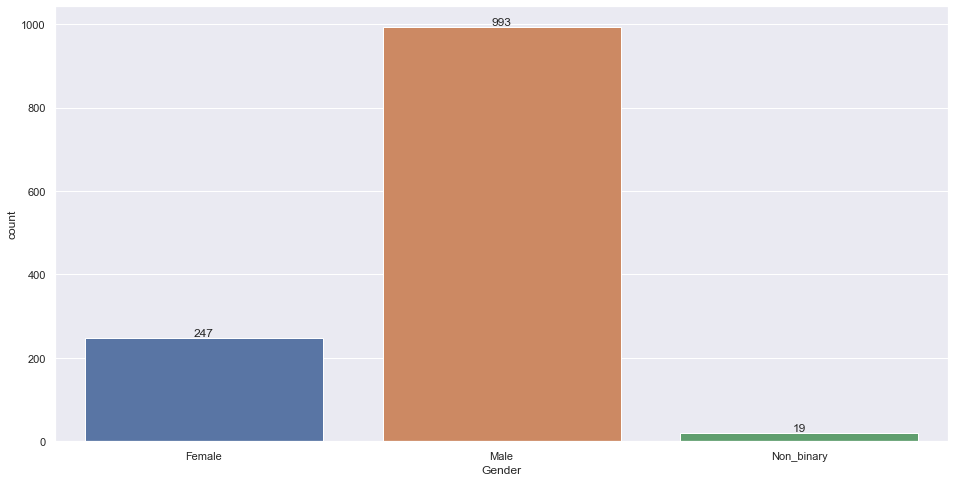

In [687]:
#replace gender names
mh['Gender'].replace(to_replace=Male,value='Male',inplace=True)
mh['Gender'].replace(to_replace=Female,value='Female',inplace=True)
mh['Gender'].replace(to_replace=Non_binary,value='Non_binary',inplace=True)

#visualize new genders
sns.set(rc={"figure.figsize":(16, 8)})
mh1 = sns.countplot(x='Gender', data = mh)
mh1.bar_label(mh1.containers[0])

[Text(0, 0, '767'), Text(0, 0, '492')]

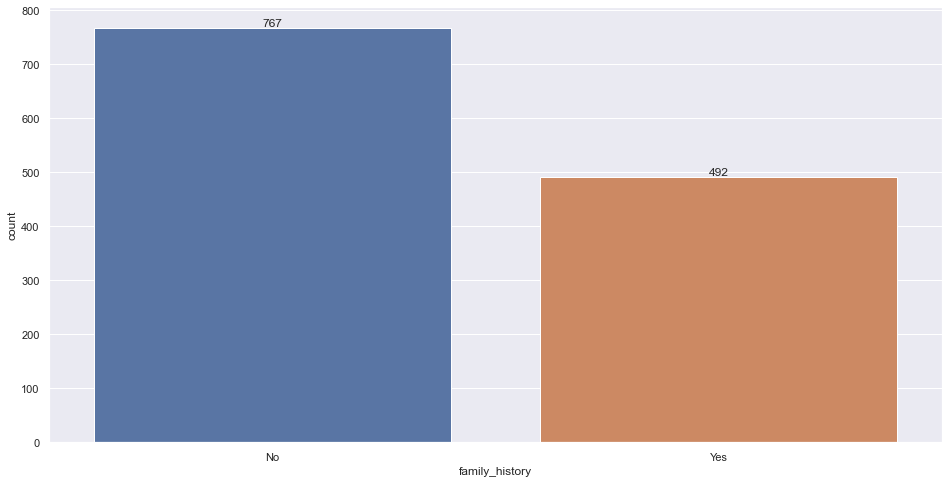

In [688]:
#visualize family_history
sns.set(rc={"figure.figsize":(16, 8)})
mh1 = sns.countplot(x='family_history', data = mh)
mh1.bar_label(mh1.containers[0])

In [689]:
#turn string variables such as Yes, No, Rarely, More than 1000 into numbers using scikit-learn's LabelEncoder package.
from sklearn.preprocessing import LabelEncoder

def encode_df(dataframe):
    le = LabelEncoder()
    for col in dataframe.columns:
        dataframe[col] = le.fit_transform(dataframe[col])
    return dataframe

mh_encoded = encode_df(mh)

<AxesSubplot:>

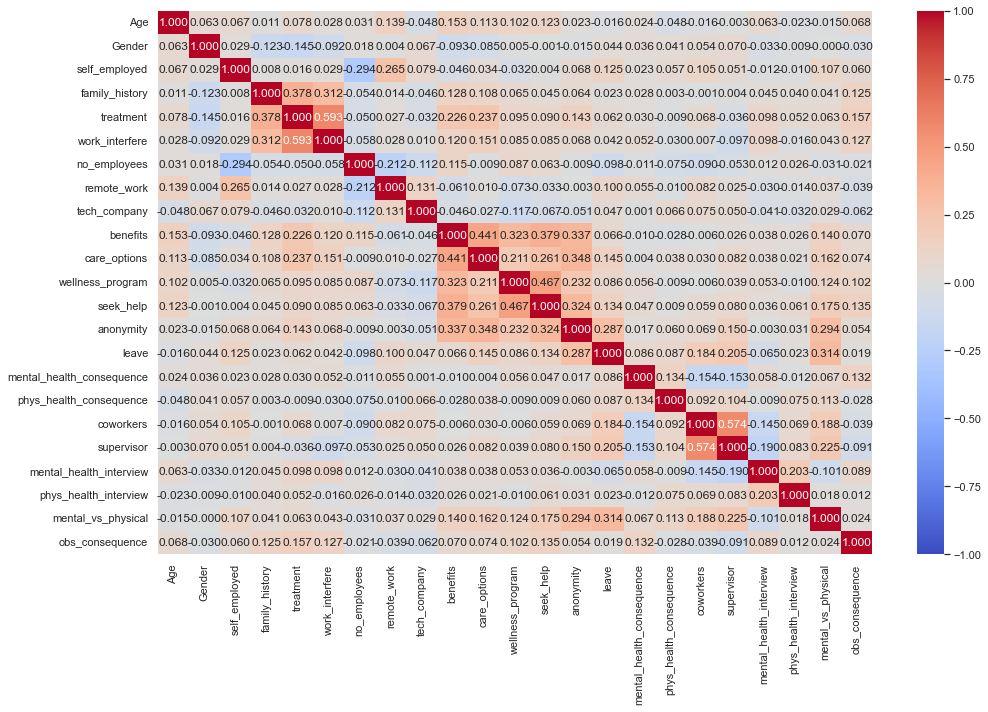

In [690]:
#correlation matrix
fig,ax = plt.subplots(figsize=(16,10))
sns.heatmap(mh_encoded.corr(), annot=True, fmt='.3f', vmin=-1, vmax=1, center=0, cmap='coolwarm', ax=ax)

In [691]:
# scale the data so each column is weighted evenly (normalization)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #zscore
scaler.fit(mh_encoded)
mh_scaled = scaler.transform(mh_encoded)

In [692]:
mh_encoded.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,19,0,2,0,1,1,4,0,1,2,...,2,2,1,1,1,2,1,0,2,0
3,13,1,2,1,1,1,2,0,1,1,...,1,1,2,2,1,0,0,0,1,1
6,17,0,2,1,1,3,0,1,1,1,...,1,1,0,0,1,0,1,1,0,0
8,24,0,2,1,1,3,1,0,1,2,...,1,3,0,1,2,2,1,0,1,0
10,13,1,2,0,1,3,4,1,1,0,...,0,0,1,1,1,2,1,1,0,0


In [693]:
#PCA
from sklearn.decomposition import PCA 
#Principal Component Analysis (PCA) is used to compress a dataset onto a lower-dimensional feature subspace with the goal of 
#maintaining most of the relevant information. It is a type of feature extraction method to reduce dimensionality


In [694]:
#pca method1, for all 23 components 
pca_23 = PCA(n_components=23, random_state = 2222)
pca_23.fit(mh_scaled)
x_pca_23 = pca_23.transform(mh_scaled)

np.cumsum(pca_23.explained_variance_ratio_*100)

array([ 12.7616335 ,  22.24147932,  30.06851865,  36.36002011,
        41.79592744,  46.95645061,  51.64004428,  56.06838946,
        60.09193318,  64.09454322,  67.8379213 ,  71.51151726,
        74.81443159,  77.97600642,  81.06823336,  83.99308522,
        86.89540836,  89.66082341,  92.23699781,  94.50032497,
        96.67054207,  98.39809228, 100.        ])

Text(0, 0.5, 'Explained variance')

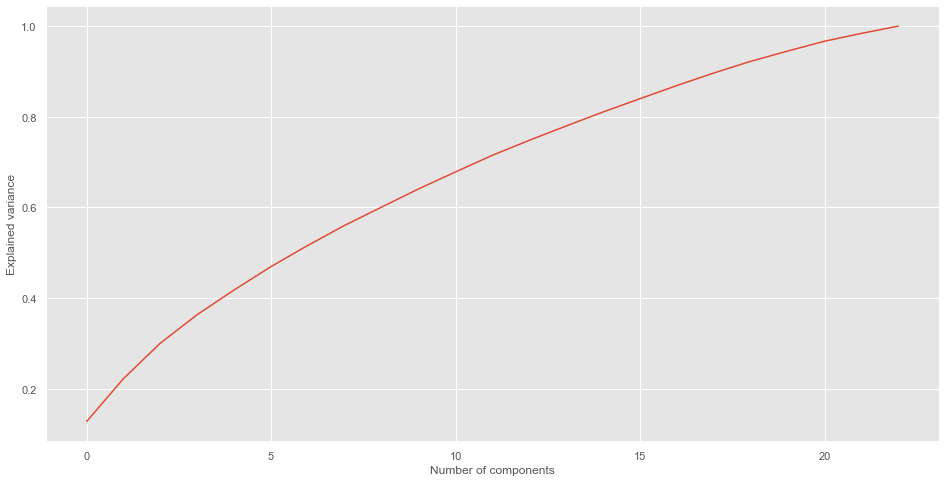

In [695]:
#pca method1, for all 23 components contd.
plt.style.use('ggplot')
plt.plot(np.cumsum(pca_23.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

Text(0, 0.5, 'Explained variance')

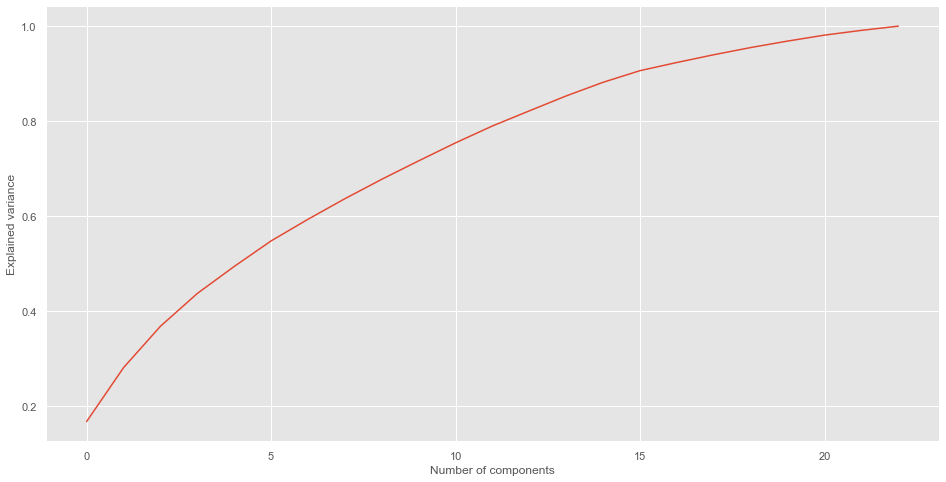

In [696]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax.fit(mh_encoded)
mh_scaled = minmax.transform(mh_encoded)


pca_23 = PCA(n_components=23, random_state = 2222)
pca_23.fit(mh_scaled)
x_pca_23 = pca_23.transform(mh_scaled)


plt.style.use('ggplot')
plt.plot(np.cumsum(pca_23.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')


In [697]:
#define target data
mh_encoded['treatment'].value_counts()/mh_encoded.shape[0]*100

#balanced data

1    50.595711
0    49.404289
Name: treatment, dtype: float64

In [698]:
mh_encoded.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,19,0,2,0,1,1,4,0,1,2,...,2,2,1,1,1,2,1,0,2,0
3,13,1,2,1,1,1,2,0,1,1,...,1,1,2,2,1,0,0,0,1,1
6,17,0,2,1,1,3,0,1,1,1,...,1,1,0,0,1,0,1,1,0,0
8,24,0,2,1,1,3,1,0,1,2,...,1,3,0,1,2,2,1,0,1,0
10,13,1,2,0,1,3,4,1,1,0,...,0,0,1,1,1,2,1,1,0,0


In [699]:
X = mh_encoded.drop('treatment', axis = 1)
y = mh['treatment']

In [700]:
#Scale data
scaler = StandardScaler()
data_std = scaler.fit_transform(X)

In [701]:
#splittimg data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   stratify = y,
                                                    test_size = 0.2,
                                                   random_state = 2222)

In [702]:
# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, plot_roc_curve
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

logreg = LogisticRegression()
tree = DecisionTreeClassifier(random_state = 2222)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state = 2222)
ada = AdaBoostClassifier(random_state = 2222)
grad = GradientBoostingClassifier(random_state = 2222)
svm = SVC(random_state = 2222)

In [703]:
#check test and train scores for all models

logreg1 = logreg.fit(X_train,y_train) #logreg = LogisticRegression()
print("Training set score of LogisticRegression: {:.3f}".format(logreg1.score(X_train,y_train)))
print("Test set score of LogisticRegression: {:.3f}".format(logreg1.score(X_test,y_test)))

DTscore = tree.fit(X_train,y_train) #tree = DecisionTreeClassifier(random_state = 2222)
print("Training set score of Decision tree: {:.3f}".format(DTscore.score(X_train,y_train)))
print("Test set score of Decision tree: {:.3f}".format(DTscore.score(X_test,y_test)))

knnscore = knn.fit(X_train,y_train) #knn = KNeighborsClassifier()
print("Training set score of knn: {:.3f}".format(knnscore.score(X_train,y_train)))
print("Test set score of knn: {:.3f}".format(knnscore.score(X_test,y_test)))

rfscore = rf.fit(X_train,y_train) #rf = RandomForestClassifier(random_state = 2222)
print("Training set score of RandomForestClassifier: {:.3f}".format(rfscore.score(X_train,y_train)))
print("Test set score of RandomForestClassifier: {:.3f}".format(rfscore.score(X_test,y_test)))

adascore = ada.fit(X_train,y_train) #ada = AdaBoostClassifier(random_state = 2222)
print("Training set score of AdaBoostClassifier: {:.3f}".format(adascore.score(X_train,y_train)))
print("Test set score of AdaBoostClassifier: {:.3f}".format(adascore.score(X_test,y_test)))

gradscore = grad.fit(X_train,y_train) #grad = GradientBoostingClassifier(random_state = 2222)
print("Training set score of GradientBoostingClassifier: {:.3f}".format(gradscore.score(X_train,y_train)))
print("Test set score of GradientBoostingClassifier: {:.3f}".format(gradscore.score(X_test,y_test)))


svmscore = svm.fit(X_train,y_train) #svm = SVC(random_state = 2222)
print("Training set score of SVM: {:.3f}".format(svmscore.score(X_train,y_train)))
print("Test set score of SVM: {:.3f}".format(svmscore.score(X_test,y_test)))


Training set score of LogisticRegression: 0.816
Test set score of LogisticRegression: 0.786
Training set score of Decision tree: 1.000
Test set score of Decision tree: 0.730
Training set score of knn: 0.834
Test set score of knn: 0.690
Training set score of RandomForestClassifier: 1.000
Test set score of RandomForestClassifier: 0.790
Training set score of AdaBoostClassifier: 0.847
Test set score of AdaBoostClassifier: 0.802
Training set score of GradientBoostingClassifier: 0.895
Test set score of GradientBoostingClassifier: 0.790
Training set score of SVM: 0.788
Test set score of SVM: 0.754


Training set score: 0.816
Test set score: 0.786
Optimization terminated successfully.
         Current function value: 0.451168
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              treatment   No. Observations:                 1259
Model:                          Logit   Df Residuals:                     1237
Method:                           MLE   Df Model:                           21
Date:                Mon, 02 May 2022   Pseudo R-squ.:                  0.3490
Time:                        20:56:08   Log-Likelihood:                -568.02
converged:                       True   LL-Null:                       -872.58
Covariance Type:            nonrobust   LLR p-value:                1.927e-115
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Age                           

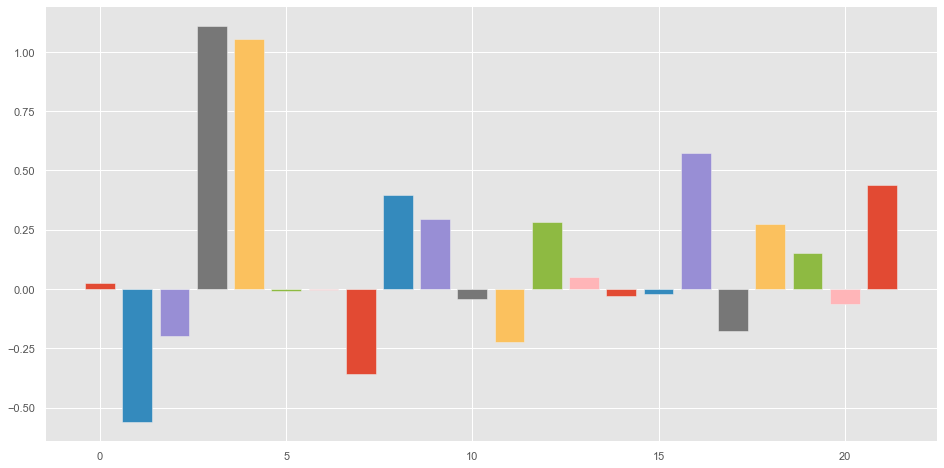

In [704]:
print("Training set score: {:.3f}".format(logreg1.score(X_train,y_train)))
print("Test set score: {:.3f}".format(logreg1.score(X_test,y_test)))

import statsmodels.api as sm
Logreg_model=sm.Logit(y,X)
result=Logreg_model.fit()
print(result.summary())

# logistic regression for feature importance

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
importance = logreg1.coef_[0]
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    pyplot.bar(i,v)
pyplot.show()

Accuracy : 78.57%


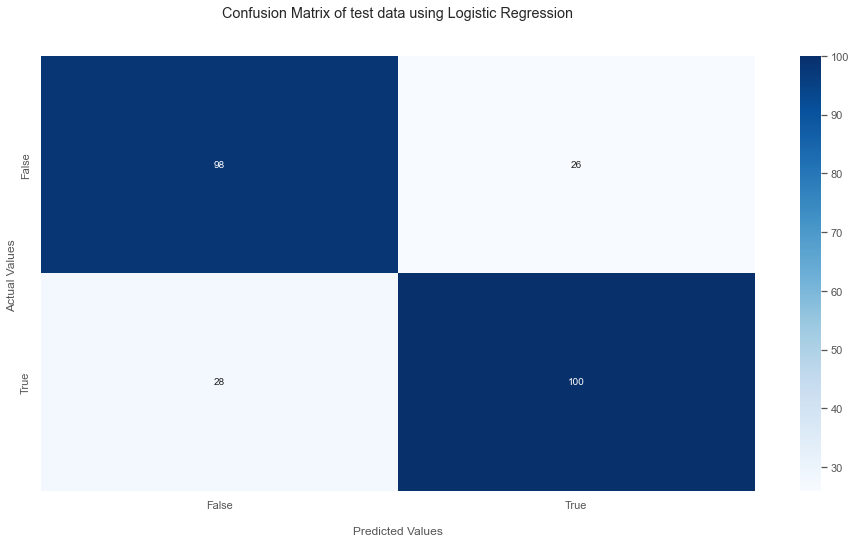

In [705]:
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

y_pred_logreg1 = logreg1.predict(X_test)
log_accuracy = accuracy_score(y_pred_logreg1, y_test) * 100
print('\033[1m' +'Accuracy : {:.2f}%'.format(log_accuracy) + '\033[0m')
cf_matrix = confusion_matrix(y_test, y_pred_logreg1)

import seaborn as sns
ax = sns.heatmap(cf_matrix, annot = True, cmap= 'Blues', fmt='g')

ax.set_title('Confusion Matrix of test data using Logistic Regression\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

#AUC-ROC
y_pred_prob1 = logreg1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_prob1)
auc = metrics.roc_auc_score(y_test, y_pred_prob1)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Accuracy : 78.97%


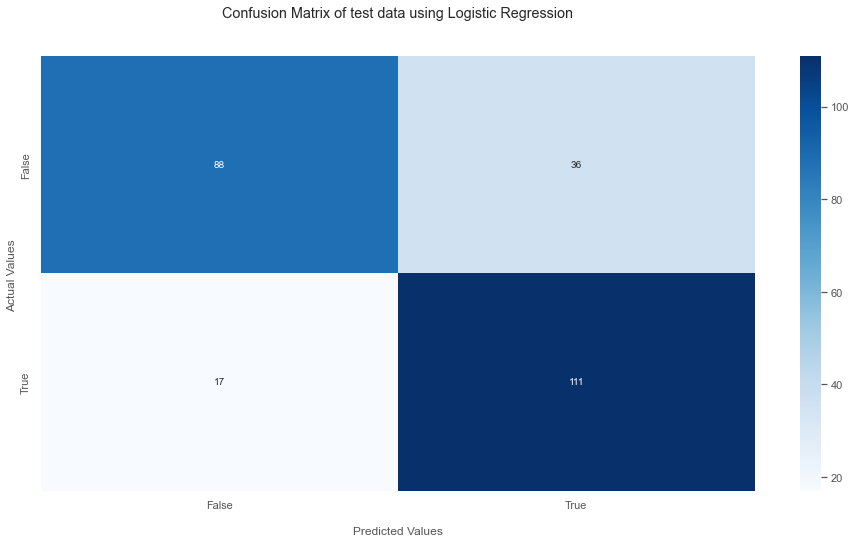

In [706]:
#Confusion Matric on Random forest Classifier test data

y_pred_rf = rfscore.predict(X_test)
log_accuracy = accuracy_score(y_pred_rf, y_test) * 100
print('\033[1m' +'Accuracy : {:.2f}%'.format(log_accuracy) + '\033[0m')
cf_matrix = confusion_matrix(y_test, y_pred_rf)

import seaborn as sns
ax = sns.heatmap(cf_matrix, annot = True, cmap= 'Blues', fmt='g')

ax.set_title('Confusion Matrix of test data using Logistic Regression\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

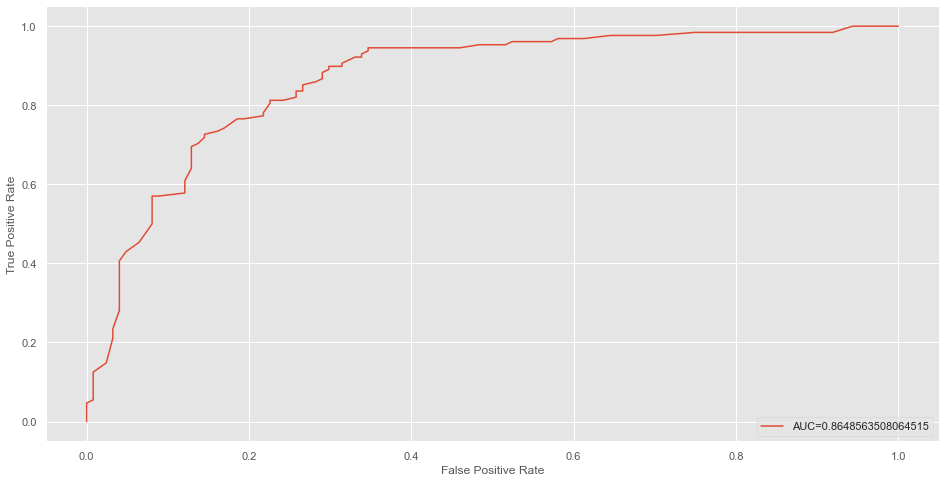

In [707]:
#AUC-ROC
y_pred_rf1 = rfscore.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_rf1)
auc = metrics.roc_auc_score(y_test, y_pred_rf1)

#create curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Accuracy : 78.97%


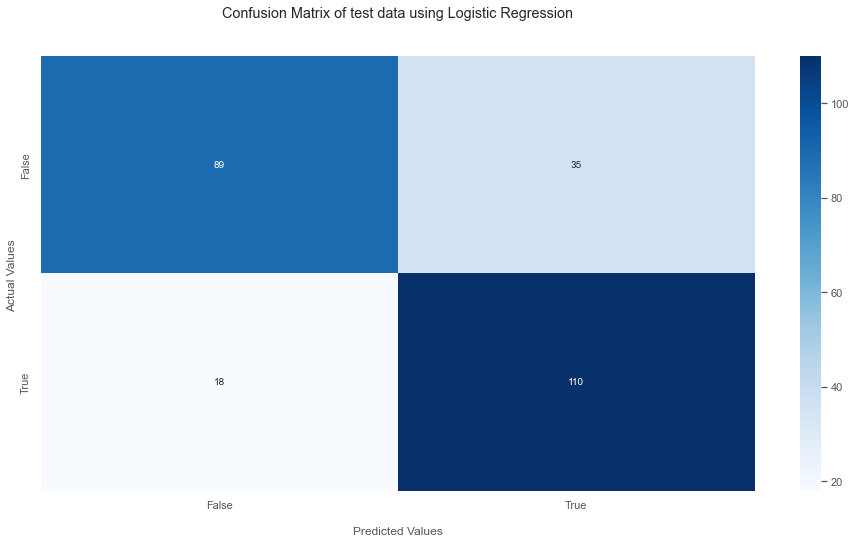

In [708]:
#Confusion Matric on Gradient boosting Classifier test data

y_pred_grad = gradscore.predict(X_test)
log_accuracy = accuracy_score(y_pred_grad, y_test) * 100
print('\033[1m' +'Accuracy : {:.2f}%'.format(log_accuracy) + '\033[0m')
cf_matrix = confusion_matrix(y_test, y_pred_grad)

import seaborn as sns
ax = sns.heatmap(cf_matrix, annot = True, cmap= 'Blues', fmt='g')

ax.set_title('Confusion Matrix of test data using Logistic Regression\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

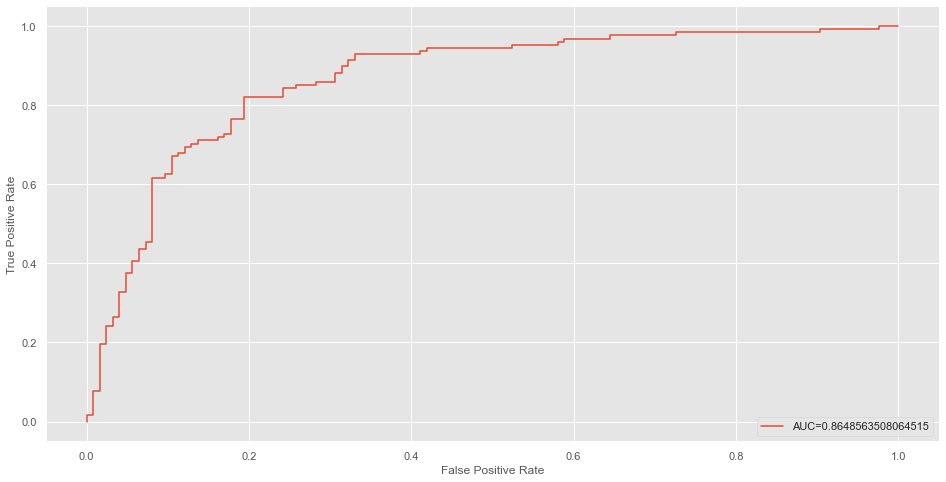

In [709]:
#AUC-ROC
y_pred_grad1 = gradscore.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_grad1)
auc = metrics.roc_auc_score(y_test, y_pred_grad1)

#create curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()